# File and libraries

In [15]:
import pandas as pd
import numpy as np


filepath=r'df_merch_pre_proc.csv'

file_tag = "df_merch_pre_proc"


## DSLabs

In [16]:
%run "dslabs_functions.py"

# Load

In [20]:
test_data=True
# test_data=False

if test_data==True:

    data=pd.read_csv(filepath)

    # data['event_timestamp'] = pd.to_datetime(data['event_timestamp'], unit='us', utc=True)
    data['event_date'] = pd.to_datetime(data['event_date'], infer_datetime_format=True)
 
    # # sort values by session id so that sessions are ordered and not excluded from dataset
    # data = data.sort_values(by=['event_timestamp'], ascending=True)
 
    # 10% sample
    data=data.sample(frac=0.1, replace=False)
    

else:
    data=pd.read_csv(filepath)

    # data['event_timestamp'] = pd.to_datetime(data['event_timestamp'], unit='us', utc=True)
    data['event_date'] = pd.to_datetime(data['event_date'], infer_datetime_format=True)

    # sort values by session id so that sessions are ordered and not excluded from dataset
    # data = data.sort_values(by=['event_timestamp'], ascending=True)
 


data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59052 entries, 477984 to 67484
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   event_date                       59052 non-null  datetime64[ns]
 1   event_name                       59052 non-null  object        
 2   event_timestamp                  59052 non-null  object        
 3   device_category                  59052 non-null  object        
 4   device_mobile_brand_name         59052 non-null  object        
 5   device_mobile_model_name         59052 non-null  object        
 6   device_operating_system          59052 non-null  object        
 7   device_operating_system_version  40441 non-null  object        
 8   device_language                  32349 non-null  object        
 9   device_web_info_browser          59052 non-null  object        
 10  device_web_info_browser_version  59052 non-null  object   

# Dimensionality

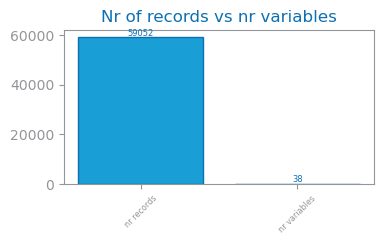

In [21]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": data.shape[0], "nr variables": data.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
# savefig(f"{file_tag}_records_variables.png")
show()

## Missing values

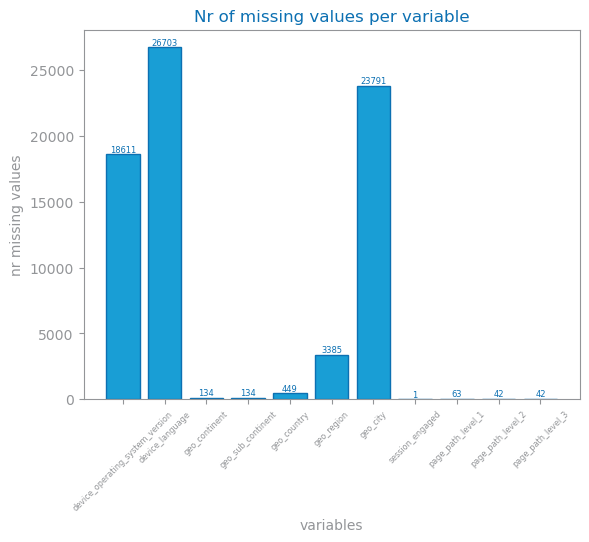

In [22]:
mv: dict[str, int] = {}
for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
# savefig(f"{file_tag}_mv.png")
show()

## Variables Type

In [23]:
data.dtypes


event_date                         datetime64[ns]
event_name                                 object
event_timestamp                            object
device_category                            object
device_mobile_brand_name                   object
device_mobile_model_name                   object
device_operating_system                    object
device_operating_system_version            object
device_language                            object
device_web_info_browser                    object
device_web_info_browser_version            object
geo_continent                              object
geo_sub_continent                          object
geo_country                                object
geo_region                                 object
geo_city                                   object
traffic_source_medium                      object
traffic_source_source                      object
session_engaged                           float64
engagement_time_msec                      float64


In [24]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
            try:
                to_numeric(df[c], errors="raise")
                variable_types["numeric"].append(c)
            except ValueError:
                try:
                    df[c] = to_datetime(df[c], errors="raise")
                    variable_types["date"].append(c)
                except ValueError:
                    variable_types["symbolic"].append(c)

    return variable_types


variable_types: dict[str, list] = get_variable_types(data)
print(variable_types)

{'numeric': ['event_date', 'engagement_time_msec', 'month', 'day', 'day_of_year', 'week_number', 'day_of_week_nr', 'hour_of_day', 'minute', 'hour_minute_fraction'], 'binary': ['session_engaged', 'returning_user', 'year', 'quarter', 'is_weekend'], 'date': ['event_timestamp'], 'symbolic': ['event_name', 'device_category', 'device_mobile_brand_name', 'device_mobile_model_name', 'device_operating_system', 'device_operating_system_version', 'device_language', 'device_web_info_browser', 'device_web_info_browser_version', 'geo_continent', 'geo_sub_continent', 'geo_country', 'geo_region', 'geo_city', 'traffic_source_medium', 'traffic_source_source', 'day_of_week', 'time_of_day', 'domain', 'page_path_level_1', 'page_path_level_2', 'page_path_level_3']}


## box plot variables

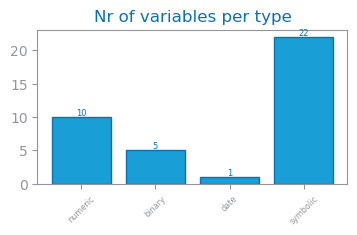

In [25]:
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
# savefig(f"{file_tag}_variable_types.png")
show()

# Data Distribution

## describe

In [26]:
summary5: DataFrame = data.describe(include="all")
summary5

,event_date,event_name,event_timestamp,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_operating_system_version,device_language,device_web_info_browser,...,day_of_week_nr,is_weekend,hour_of_day,minute,hour_minute_fraction,time_of_day,domain,page_path_level_1,page_path_level_2,page_path_level_3
count,59052,59052,59052,59052,59052,59052,59052,40441,32349,59052,...,59052.000000,59052.000000,59052.000000,59052.000000,59052.000000,59052,59052,58989,59010,59010
unique,NaN,13,NaN,3,9,15,7,10,9,5,...,NaN,NaN,NaN,NaN,NaN,4,3,41,105,543
top,NaN,view_item,NaN,desktop,Apple,PC,Windows,10,en-us,Chrome,...,NaN,NaN,NaN,NaN,NaN,Night,shop.googlemerchandisestore.com,Google Redesign,Google Redesign/Apparel,Home
freq,NaN,23279,NaN,34179,25370,16042,18361,21445,21999,41019,...,NaN,NaN,NaN,NaN,NaN,19834,56816,41788,18016,8894
mean,2020-12-14 02:02:07.291201280,NaN,2020-12-14 14:00:07.720489984+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.726224,0.210916,11.468418,29.403306,11.958473,NaN,NaN,NaN,NaN,NaN
min,2020-11-01 00:00:00,NaN,2020-11-01 00:00:14.982984+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2020-11-26 00:00:00,NaN,2020-11-26 01:38:52.003333632+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,5.000000,14.000000,5.933333,NaN,NaN,NaN,NaN,NaN
50%,2020-12-11 00:00:00,NaN,2020-12-11 04:19:45.770619904+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,0.000000,11.000000,29.000000,11.916667,NaN,NaN,NaN,NaN,NaN
75%,2021-01-04 00:00:00,NaN,2021-01-04 21:46:18.849903104+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,0.000000,18.000000,44.000000,18.033333,NaN,NaN,NaN,NaN,NaN
max,2021-01-31 00:00:00,NaN,2021-01-31 23:57:49.970474+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000,1.000000,23.000000,59.000000,23.983333,NaN,NaN,NaN,NaN,NaN


## numeric Variables

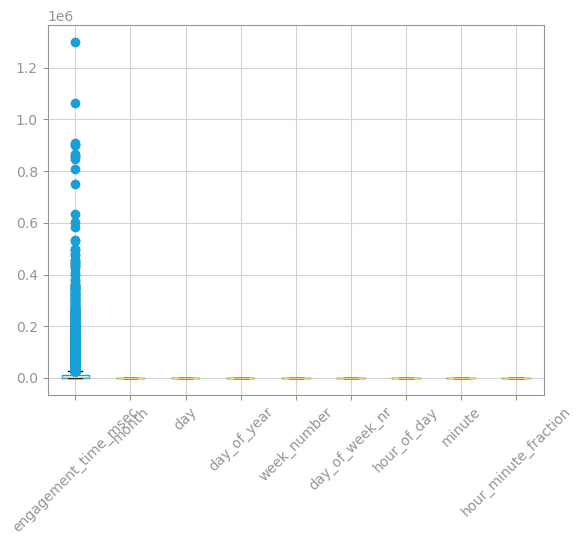

In [27]:
from matplotlib.pyplot import savefig, show


# variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variable_types["numeric"]


if [] != numeric:
    data[numeric].boxplot(rot=45)
   # savefig(f"{file_tag}_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

# Balancing and class distribution

## first evaluation

returning_user
0    52759
1     6293
Name: count, dtype: int64


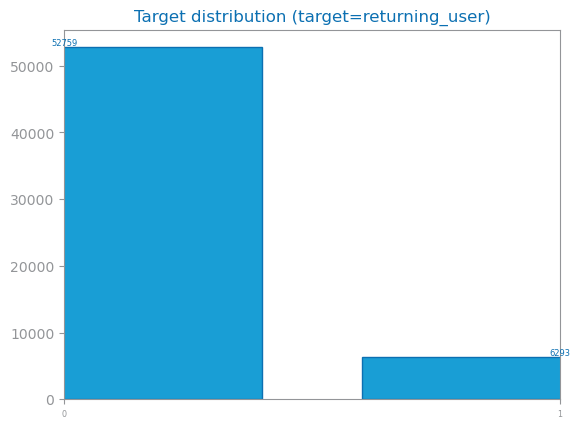

In [28]:
import matplotlib.pyplot as plt
    
from matplotlib.collections import PathCollection
from matplotlib.colorbar import Colorbar
from matplotlib.container import BarContainer
from matplotlib.figure import Figure
from matplotlib.font_manager import FontProperties
from matplotlib.axes import Axes
from matplotlib.pyplot import gca, gcf, savefig, subplots, text
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

target = "returning_user"

values: Series = data[target].value_counts()
print(values)

Figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
#savefig(f"images/{file_tag}_class_distribution.png")
show()

# Symbolic Variables

In [29]:
from dslabs_functions import plot_bar_chart

symbolic: list[str] = variable_types["symbolic"] + variable_types["binary"]
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(symbolic)):
        counts: Series = data[symbolic[n]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, j],
            title="Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    # savefig(f"{file_tag}_histograms_symbolic.png")
    show()
else:
    print("There are no symbolic variables.")

# Symbolic distribution per target variable counts

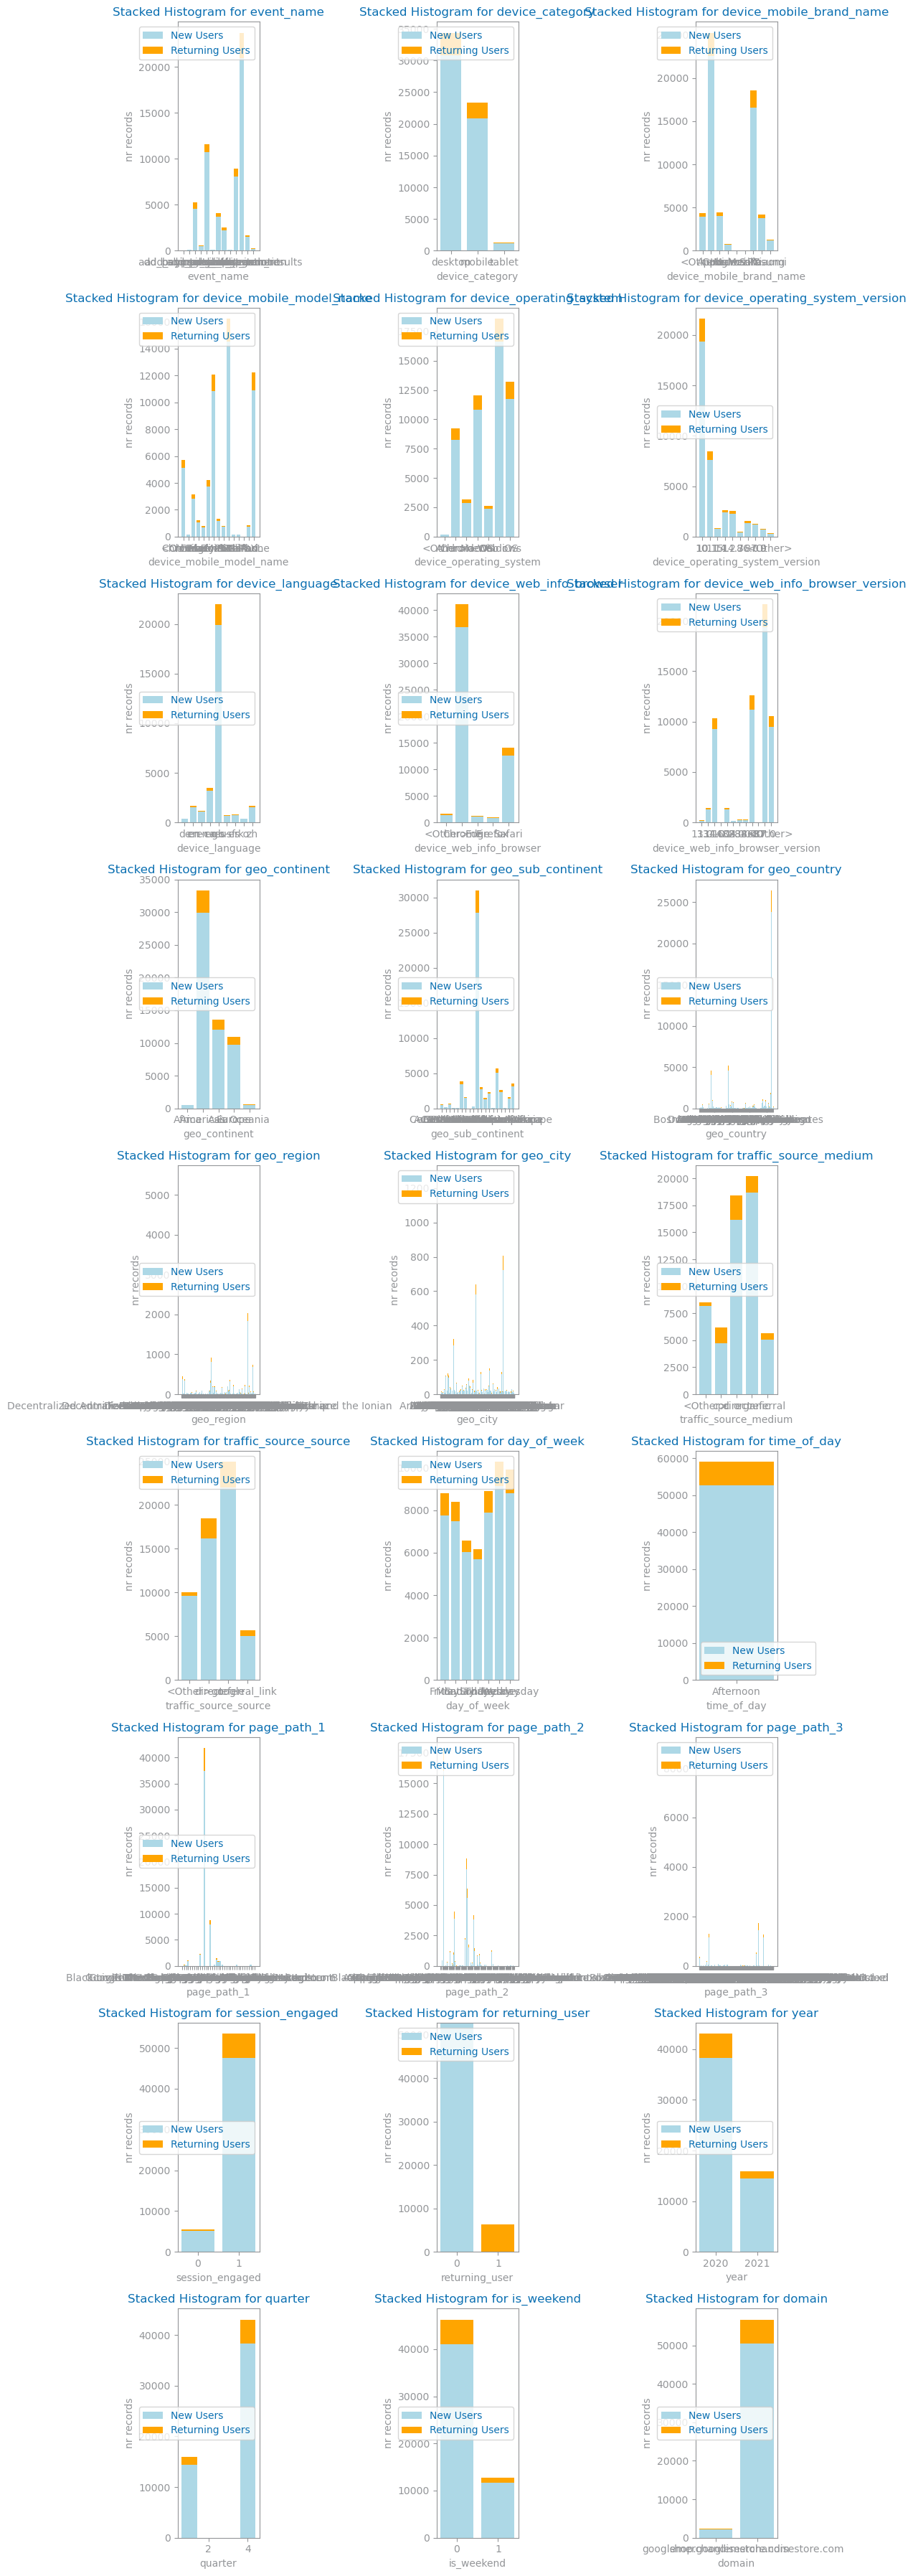

In [13]:
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(symbolic)):
        # Group by the symbolic variable and 'returning_user', and get counts
        grouped_counts: pd.DataFrame = data.groupby([symbolic[n], 'returning_user']).size().unstack(fill_value=0)
        
        # Get the index (categories) and values (counts of new and returning users)
        categories = grouped_counts.index.to_list()
        new_users = grouped_counts[0].to_list()  # New users (ga_session_number = 1)
        returning_users = grouped_counts[1].to_list()  # Returning users (ga_session_number > 1)

        # Plot stacked bar chart
        axs[i, j].bar(categories, new_users, label="New Users", color="lightblue")
        axs[i, j].bar(categories, returning_users, bottom=new_users, label="Returning Users", color="orange")

        # Add chart details
        axs[i, j].set_title(f"Stacked Histogram for {symbolic[n]}")
        axs[i, j].set_xlabel(symbolic[n])
        axs[i, j].set_ylabel("nr records")
        
        # Add legend
        axs[i, j].legend()

        # Move to the next subplot
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)

    # Adjust layout
    fig.tight_layout()

### Filtered to top 10 value counts dimensions' per variable

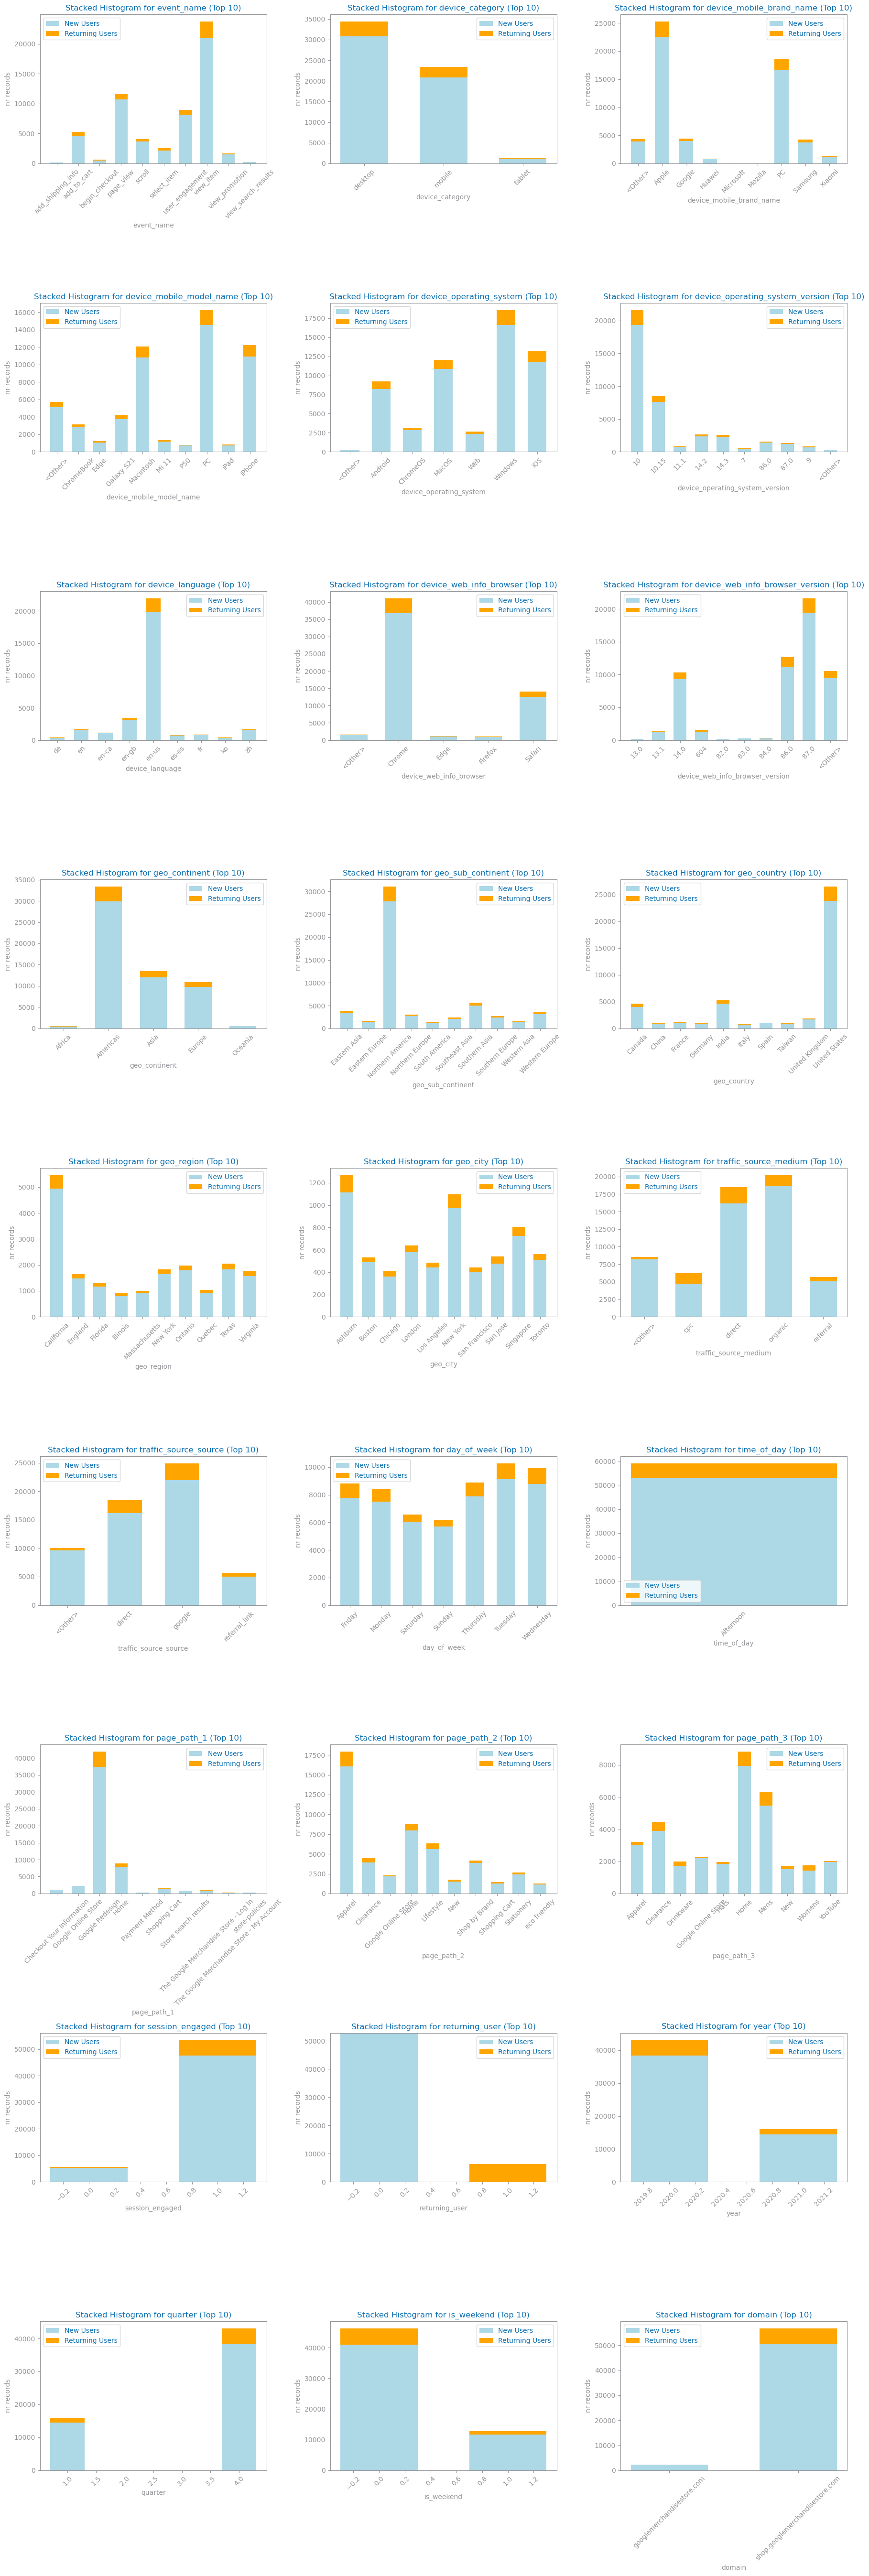

In [14]:

# Assuming you have already created a 'returning_user' column in your data

symbolic: list[str] = variable_types["symbolic"] + variable_types["binary"]

# Check if there are symbolic variables
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    
    # Increase the figure size to improve spacing (adjust the scale as needed)
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT * 1.5, rows * HEIGHT * 1.5), squeeze=False
    )
    
    i, j = 0, 0
    for n in range(len(symbolic)):
        # Get value counts for the symbolic variable and limit to top 10 categories
        top_10_categories = data[symbolic[n]].value_counts().nlargest(10).index

        # Filter the data to include only the top 10 categories for the symbolic variable
        filtered_data = data[data[symbolic[n]].isin(top_10_categories)]

        # Group by the symbolic variable and 'returning_user', and get counts
        grouped_counts: pd.DataFrame = filtered_data.groupby([symbolic[n], 'returning_user']).size().unstack(fill_value=0)

        # Get the index (top 10 categories) and values (counts of new and returning users)
        categories = grouped_counts.index.to_list()
        new_users = grouped_counts[0].to_list()  # New users (ga_session_number = 1)
        returning_users = grouped_counts[1].to_list()  # Returning users (ga_session_number > 1)

        # Plot stacked bar chart with adjusted bar width
        bar_width = 0.6  # Adjust bar width
        axs[i, j].bar(categories, new_users, width=bar_width, label="New Users", color="lightblue")
        axs[i, j].bar(categories, returning_users, bottom=new_users, width=bar_width, label="Returning Users", color="orange")

        # Add chart details
        axs[i, j].set_title(f"Stacked Histogram for {symbolic[n]} (Top 10)")
        axs[i, j].set_xlabel(symbolic[n])
        axs[i, j].set_ylabel("nr records")
        
        # Rotate x-axis labels for better readability
        axs[i, j].tick_params(axis='x', rotation=45)

        # Add legend
        axs[i, j].legend()

        # Move to the next subplot
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)

    # Adjust layout for better fitting
    fig.tight_layout()

    # Show the plot
    show()

else:
    print("There are no symbolic variables.")



# Insights